# Punto 5.8
Punto (a)

In [27]:
import pandas as pd
import statsmodels.api as sm 
import numpy as np

df = pd.read_csv('Auto.csv')
df = df.replace('?', np.nan)
df.dropna(axis=0, how='any',inplace=True)
df['horsepower'] = df['horsepower'].astype(float)
X = df['horsepower']
y = df['mpg']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Fri, 08 Nov 2024   Prob (F-statistic):           7.03e-81
Time:                        11:33:21   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

In [29]:
horsepower_98 = pd.DataFrame({'const': [1], 'horsepower': [98]})
prediction = model.get_prediction(horsepower_98)
print(prediction.summary_frame(alpha=0.05)) 


        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  24.467077  0.251262      23.973079      24.961075     14.809396   

   obs_ci_upper  
0     34.124758  


Punto (b)

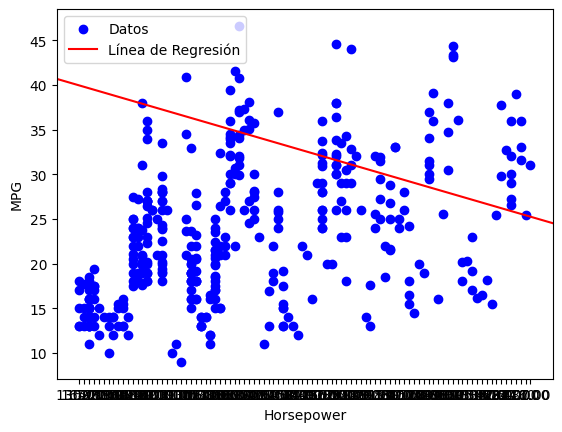

In [28]:
import matplotlib.pyplot as plt

plt.scatter(data['horsepower'], data['mpg'], color='blue', label='Datos')
plt.xlabel('Horsepower')
plt.ylabel('MPG')

ax = plt.gca()
ax.axline((0, model.params['const']), slope=model.params['horsepower'], color="red", label='Línea de Regresión')

plt.legend()
plt.show()


Punto (c)


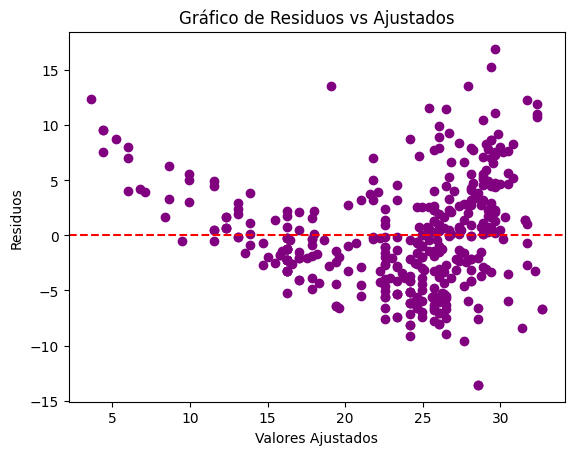

In [30]:
residuals = model.resid
fitted = model.fittedvalues

# Residuals vs Fitted plot
plt.scatter(fitted, residuals, color="purple")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos vs Ajustados')
plt.show()


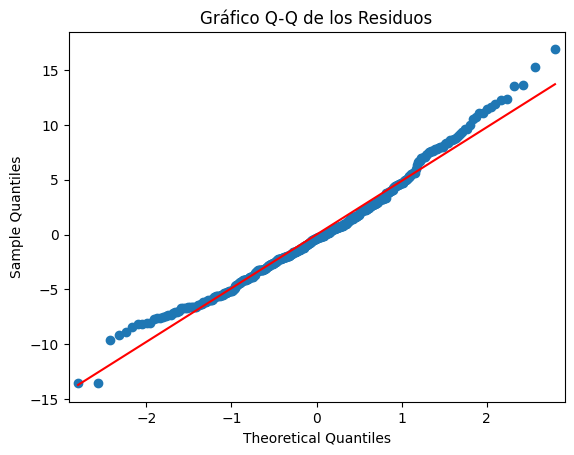

In [31]:
sm.qqplot(residuals, line='s')
plt.title('Gráfico Q-Q de los Residuos')
plt.show()


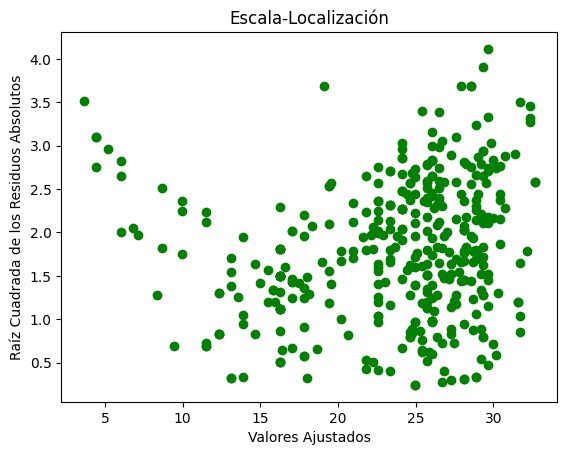

: 

In [32]:

plt.scatter(fitted, np.sqrt(np.abs(residuals)), color="green")
plt.xlabel('Valores Ajustados')
plt.ylabel('Raíz Cuadrada de los Residuos Absolutos')
plt.title('Escala-Localización')
plt.show()
